### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [30]:
import tensorflow as tf
tf.random.set_seed(42)

In [31]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [32]:
tf.__version__

'2.0.0'

### Collect Data

In [33]:
from tensorflow import keras

In [34]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [35]:
print(trainY[0:5])

[9 0 0 3 0]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [36]:
#Converting our labels to categorial - one hot vectors
trainY = keras.utils.to_categorical(trainY, 10)
testY = keras.utils.to_categorical(testY, 10)

In [37]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

Label =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


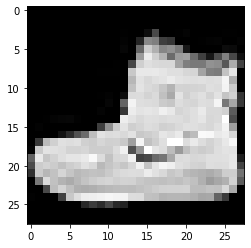

----------------------------------------

Label =  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


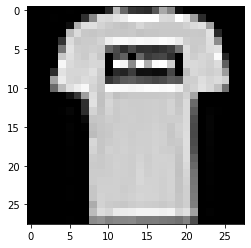

----------------------------------------

Label =  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


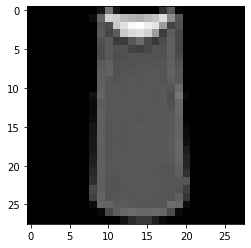

----------------------------------------

Label =  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


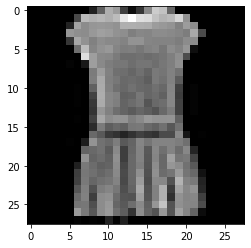

----------------------------------------

Label =  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


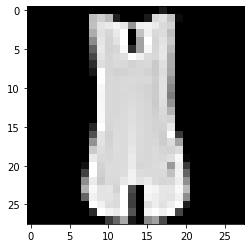

----------------------------------------

Label =  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


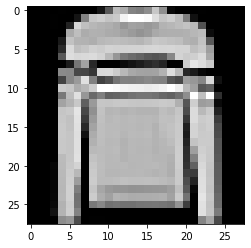

----------------------------------------

Label =  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


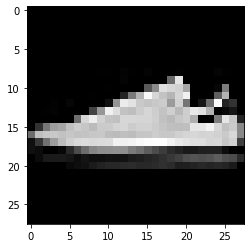

----------------------------------------

Label =  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


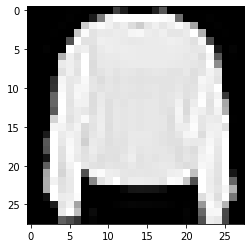

----------------------------------------

Label =  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


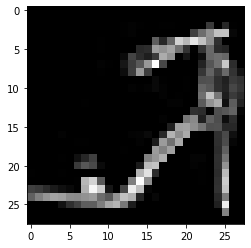

----------------------------------------

Label =  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


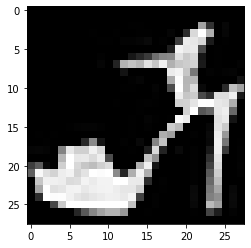

----------------------------------------

Label =  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


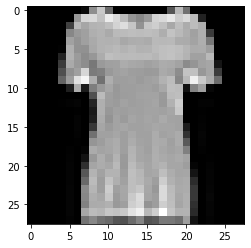

----------------------------------------



In [39]:
#Writing loop to display first 10 images in training set along with its label displayed at the top
for i in range(11):
    print('Label = ', trainY[i])
    plt.imshow(trainX[i,:,:],cmap='gray'); plt.show()
    print('----------------------------------------\n')

The images are of shoes, shirts, tops etc.

In [40]:
#Reshaping Training & Testing samples suitable for #tensorflow backend
trainX=trainX.reshape(trainX.shape[0],784).astype('float32')
testX=testX.reshape(testX.shape[0],784).astype('float32')

#Dividing the pixel values by 255
trainX = trainX/255
testX = testX/255

Reshaping the training and testing data in this format so that it can be fed to the neural network, converting 3D table to a 2D table.

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [41]:
# Initialize the constructor
model1 = Sequential(name = 'Default')
# Initializing first hidden layer to have 784 nodes and the second to have 100 nodes
#Considering the relu activation function for the hidden layers
model1.add(Dense(784, activation ='relu'))
model1.add(Dense(100, activation ='relu'))
#Adding the output layer which has 10 nodes and uses the softmax activation function
model1.add(Dense(10,activation='softmax'))

We prefer softmax in the output layer as we need a probability value (between 0 and 1) for the output


In [42]:
#Using the default SGD optimizer, categorical crossentropy to measure loss and accuracy as the training metric
model1.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

### Execute the model using model.fit()

In [43]:
#Considering a batch size of 256 and 10 epochs
model1.fit(trainX, trainY, epochs=10, batch_size=256, verbose=1)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 30us/sample - loss: 1.1665 - accuracy: 0.6665
Epoch 2/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.7136 - accuracy: 0.7767
Epoch 3/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.6125 - accuracy: 0.8031
Epoch 4/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.5591 - accuracy: 0.8172
Epoch 5/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.5264 - accuracy: 0.8252
Epoch 6/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.5033 - accuracy: 0.8303
Epoch 7/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.4859 - accuracy: 0.8351
Epoch 8/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.4726 - accuracy: 0.8382
Epoch 9/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.4617 - accuracy: 0.8421
Epoch 10/10
60

Without BatchNormalization, the model has achieved a training accuracy of 84.55%.

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [44]:
#Importing the BatchNormalization package from keras.layers
from tensorflow.keras.layers import BatchNormalization

In [45]:
# Defining the same model architecture as before
model2 = Sequential(name = 'Default_with_Batch_Normalization')
#Adding the Batch Normalization layer after the input layer
model2.add(BatchNormalization())
model2.add(Dense(784, activation ='relu'))
model2.add(Dense(100, activation ='relu'))
model2.add(Dense(10,activation='softmax'))

In [46]:
model2.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [47]:
model2.fit(trainX, trainY, epochs=10, batch_size=256, verbose=1)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.8127 - accuracy: 0.7345
Epoch 2/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.5101 - accuracy: 0.8213
Epoch 3/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.4508 - accuracy: 0.8417
Epoch 4/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.4192 - accuracy: 0.8521
Epoch 5/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3979 - accuracy: 0.8595
Epoch 6/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3817 - accuracy: 0.8646
Epoch 7/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3686 - accuracy: 0.8701
Epoch 8/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3564 - accuracy: 0.8748
Epoch 9/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3472 - accuracy: 0.8768
Epoch 10/10
60

After adding BatchNormalization, the training accuracy of the model has increased to 88% (An increase of 3.5% from earlier)

### Execute the model

In [48]:
#Using the evaluate function to get the test accuracy
loss, acc = model2.evaluate(testX, testY, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.864
Loss: 0.385


As the testing accuracy is very close to the training accuracy (difference of 1.4%) we can see that the model is not overfit.

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [49]:
#Importing the optimizers package from the keras library
#Will use this package to create a customized SGD optimizer
from tensorflow.keras import optimizers

In [50]:
# Defining the same model architecture as previous iterations
model3 = Sequential(name = 'Sgd_with_lr0.001')
model3.add(BatchNormalization())
model3.add(Dense(784, activation ='relu'))
model3.add(Dense(100, activation ='relu'))
model3.add(Dense(10,activation='softmax'))

#Creating our customized sgd optimizer with a learning rate of 0.001
sgd = optimizers.SGD(lr=0.001)

#Using the above created sgd optimizer while compiling our model
model3.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#Fitting on the training data
model3.fit(trainX, trainY, epochs=10, batch_size=256, verbose=1)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 44us/sample - loss: 1.5739 - accuracy: 0.4956
Epoch 2/10
60000/60000 [==============================] - 2s 40us/sample - loss: 1.0051 - accuracy: 0.6972
Epoch 3/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.8364 - accuracy: 0.7372
Epoch 4/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.7490 - accuracy: 0.7589
Epoch 5/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.6935 - accuracy: 0.7717
Epoch 6/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.6539 - accuracy: 0.7818
Epoch 7/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.6233 - accuracy: 0.7907
Epoch 8/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.5992 - accuracy: 0.7968
Epoch 9/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.5786 - accuracy: 0.8031
Epoch 10/10
60

After using the custom SGD optimizer (lr = 0.001), the training accuracy seems to have dropped by ~8%.

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [51]:
# Define the model architecture as specified in the question
model4 = Sequential(name = 'Final_sgd_with_lr0.03')
#Adding the Batch Normalization layer
model4.add(BatchNormalization())
#Using 100 nodes and the sigmoid activation function
model4.add(Dense(100, activation ='sigmoid'))
model4.add(Dense(100, activation ='sigmoid'))
#Output layer stays the same with 10 nodes and the softmax activation function
model4.add(Dense(10,activation='softmax'))

#Creating our custom sgd optimizer with learning rate as 0.03
sgd = optimizers.SGD(lr=0.03)

#Compiling the model with the optimizer created above along with the same loss and metrics parameters
model4.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#Fitting on the training data
model4.fit(trainX, trainY, epochs=10, batch_size=256, verbose=1)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 16us/sample - loss: 1.9528 - accuracy: 0.5060
Epoch 2/10
60000/60000 [==============================] - 1s 14us/sample - loss: 1.3853 - accuracy: 0.6658
Epoch 3/10
60000/60000 [==============================] - 1s 12us/sample - loss: 1.0467 - accuracy: 0.7217
Epoch 4/10
60000/60000 [==============================] - 1s 12us/sample - loss: 0.8625 - accuracy: 0.7427
Epoch 5/10
60000/60000 [==============================] - 1s 12us/sample - loss: 0.7589 - accuracy: 0.7535
Epoch 6/10
60000/60000 [==============================] - 1s 12us/sample - loss: 0.6954 - accuracy: 0.7638
Epoch 7/10
60000/60000 [==============================] - 1s 12us/sample - loss: 0.6518 - accuracy: 0.7743
Epoch 8/10
60000/60000 [==============================] - 1s 12us/sample - loss: 0.6179 - accuracy: 0.7840
Epoch 9/10
60000/60000 [==============================] - 1s 12us/sample - loss: 0.5913 - accuracy: 0.7916
Epoch 10/10
60

After changing the lr to 0.03, the training accuracy is more or less the same as the previous iteration (lr= 0.001), but the model ran a **lot faster**.

## Review model

In [53]:
#Reviewing all the 4 iterations
model1.summary()
model2.summary()
model3.summary()
model4.summary()

Model: "Default"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             multiple                  615440    
_________________________________________________________________
dense_13 (Dense)             multiple                  78500     
_________________________________________________________________
dense_14 (Dense)             multiple                  1010      
Total params: 694,950
Trainable params: 694,950
Non-trainable params: 0
_________________________________________________________________
Model: "Default_with_Batch_Normalization"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3 (Batch multiple                  3136      
_________________________________________________________________
dense_15 (Dense)             multiple                  615440    
___________

### Run the model

In [54]:
#Evaluating the model based on the latest iteration - model4
loss, acc = model4.evaluate(testX, testY, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.795
Loss: 0.575


In [55]:
#Evaluating the model that had the best training accuracy - model2
loss, acc = model2.evaluate(testX, testY, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.864
Loss: 0.385


In [57]:
#Getting the predicted values using the model from the second iteration
y_predict = model2.predict(testX)

array([1.4680432e-05, 3.3601442e-05, 2.8918337e-05, 2.4381216e-05,
       4.1262874e-06, 1.2049194e-01, 4.4974335e-05, 2.2185892e-01,
       1.4886211e-03, 6.5600985e-01], dtype=float32)

In [64]:
#Converting predicted values from 10D to 1D
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))

In [65]:
#Converting test values from 10D to 1D
y_test = []
for val in testY:
    y_test.append(np.argmax(val))

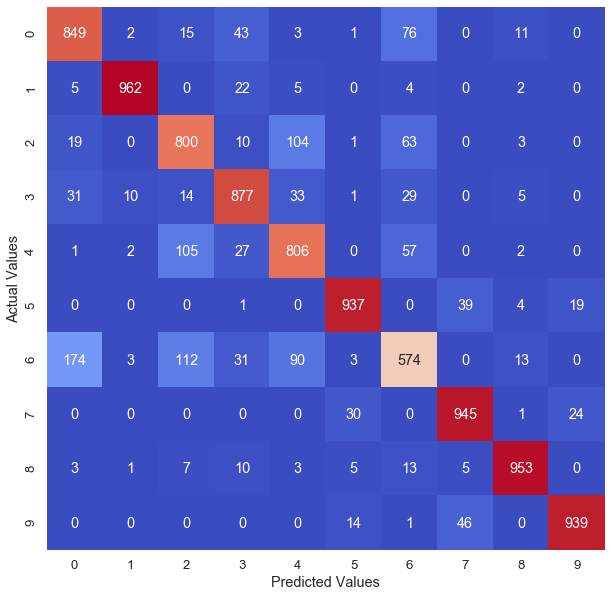

In [98]:
#Printing the confusion matrix
import seaborn as sns
plt.figure(figsize = (10,10)); sns.set(font_scale=1.2)
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot = True, fmt='d', cbar = False, cmap = 'coolwarm')
plt.xlabel('Predicted Values'); plt.ylabel('Actual Values')
plt.show()

In [99]:
#Printing the classification report
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      1000
           1       0.98      0.96      0.97      1000
           2       0.76      0.80      0.78      1000
           3       0.86      0.88      0.87      1000
           4       0.77      0.81      0.79      1000
           5       0.94      0.94      0.94      1000
           6       0.70      0.57      0.63      1000
           7       0.91      0.94      0.93      1000
           8       0.96      0.95      0.96      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



The model was able to identify and predict items [1,5,7,8,9] very well and did not perform as well for items [0,2,4,6].

### Conclusion

Out of the 4 iterations that we have tried, the best model was obtained in iteration2:  
1. One with default SGD optimizer
2. 784 nodes in the first hidden layer
3. Uses a batch normalization layer after the input layer  

**The model had a training accuracy of 88% and a test accuracy of 86.5%.**

In [26]:
model2.summary()

Model: "Default_with_Batch_Normalization"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo multiple                  3136      
_________________________________________________________________
dense_3 (Dense)              multiple                  615440    
_________________________________________________________________
dense_4 (Dense)              multiple                  78500     
_________________________________________________________________
dense_5 (Dense)              multiple                  1010      
Total params: 698,086
Trainable params: 696,518
Non-trainable params: 1,568
_________________________________________________________________


-----